# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#Read the dataset from the ab_data.csv
df = pd.read_csv('ab_data.csv')


In [3]:
# View a top few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
# Use shape to view the number of rows
df.shape[0]

294478

The number of rows in the dataset is `294478`

**c.** The number of unique users in the dataset.

In [5]:
# Use the nunique() function to show the number of unique of each column in the dataset.
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

The number of unique users in the dataset based on user_id : `290584`

**d.** The proportion of users converted.

In [6]:
# Proportion of users converted = total converted page / the number of all pages
df['converted'].mean()

0.11965919355605512

The proportion of users converted is `11.96%`.

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
# Use query function to filter which row has "treatment" group and "new_page"
df.query("group == 'treatment' & landing_page != 'new_page'").count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

The number of times when the "group" is treatment but "landing_page" is not a new_page is `1965`.

**f.** Do any of the rows have missing values?

In [8]:
# Use info function to check the number of non-null rows in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


The rows don't have any missing values

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
        |((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
# Use nunique to get the number of unique user_ids in df2
df2.user_id.nunique()

290584

The number of unique ids in df2 is 290584, unchanged from df.

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Use index to show to row's number of the duplicated user_id
df2.index[df2.user_id.duplicated() == True]

Int64Index([2893], dtype='int64')

The duplicated row's index is 2893

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
#Display the row for the duplicate user_id
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id.. 
duplicated_row = df2[df2.user_id.duplicated() == True].index
df2 = df2.drop(duplicated_row, axis=0)

In [15]:
# Check again if the row with a duplicate user_id is deleted or not - the result should be 0
sum(df2.user_id.duplicated())

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [16]:
# Calculate the probalitity of converted in df2 dataset.
df2['converted'].mean()

0.11959708724499628

The probability of an individual converting regardless of the page they receive is `11.95%`

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Calculate the probalitity of converted in the control group.
old_converted_rate = df2[df2['group'] == 'control'].converted.mean()

In [18]:
#print the result
print(old_converted_rate)

0.1203863045


The probability of converted in control group is `12.04%`

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Calculate the probalitity of converted in the treatment group.
new_converted_rate = df2[df2['group'] == 'treatment'].converted.mean()

In [20]:
#print the result
print(new_converted_rate)

0.118808065515


The probability of converted in treatment group is `11.88%`

In [21]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = new_converted_rate - old_converted_rate

In [22]:
#print the result
print(obs_diff)

-0.00157823898536


The actual difference (obs_diff) between the conversion rates for the two groups is -0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [23]:
#Calculate the probability that an individual received the new page
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

The probability that an individual received the new page is `50%`, equal the individual received the old page

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

- The probability of an individual receiving a new page is 50.01% meaning that the distribution of landing pages is balanced. It will give a fair study as both sample sizes are equal.
- The actual difference between the conversion rates for the two groups is negative (-0.0015782389853555567) but it is quite small, so we cannot determine whether this difference is statistically signigicant.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

$$H_0: p_{new} - p_{old} \le 0$$

$$H_1: p_{new} - p_{old} \gt 0$$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [24]:
#Because p_new = p_old = p_population,so p_new is equal to the conversion rate of all pages.
p_new = df2['converted'].mean()

In [25]:
#print the result
print(p_new)

0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [26]:
# Similar to the conversion rate for p_new, p_old is equal to the conversion rate of all pages.
p_old = df2['converted'].mean()

In [27]:
#print the result
print(p_old)

0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [28]:
#get the number of treatment group 's rows
n_new = df2[df2['group'] == 'treatment'].shape[0]

In [29]:
#print the result
print(n_new)

145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [30]:
#get the number of control group 's rows
n_old = df2[df2['group'] == 'control'].shape[0]

In [31]:
#print the result
print(n_old)

145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [32]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = n_new, p = [1- p_new, p_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [33]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size = n_old, p = [1- p_old, p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [34]:
#Calculate the difference in the "converted" probability
conversion_diff_simulated = new_page_converted.mean() - old_page_converted.mean()

In [35]:
#print the result
print(conversion_diff_simulated)

0.00191140242986



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [36]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    # Simulate a Sample for the treatment Group
    new_page_converted = np.random.choice([0,1], size = n_new, p = [1- p_new, p_new])
    # Simulate a Sample for the control Group
    old_page_converted = np.random.choice([0,1], size = n_old, p = [1- p_old, p_old])
    #Find the difference in the "converted" probability
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

Text(0,0.5,'Frequency')

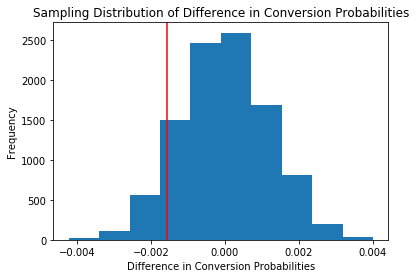

In [37]:
#plot the histogram of p_diffs array
plt.hist(p_diffs)

#Use axvline() to mark the actual difference observed (marked with red line)
plt.axvline(obs_diff, c='red')

#Set title and label for both axes.
plt.title('Sampling Distribution of Difference in Conversion Probabilities')
plt.xlabel('Difference in Conversion Probabilities')
plt.ylabel('Frequency')

The red line is on the left side of the chart, showing no significant difference in conversion rates. The actual observed difference even shows that the new page converts less than the old page.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [38]:
#Calculate the proportion of the p_diffs are greater than the actual difference observed in the df2 data
(p_diffs > obs_diff).mean()

0.90239999999999998

p_value is 0.902, it is much greater than the type I error rate (0.05)

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

## - This values is called p-value. The p-value is the probability of getting our statistic or more extreme value if null is true.
- The p-value is 0.902. This value is much greater than the type I error rate (0.05). Therefore, it fails to reject the null hypothesis (Don't have enough evidence to reject the null hypothesis at the 5% significance level).



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [39]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2['group'] == 'control']['converted'].sum()

# number of conversions with the new_page
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2[df2['group'] == 'control'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['group'] == 'treatment'].shape[0]

#print the calculated results.
print("convert_old:", convert_old)
print("convert_new:", convert_new)
print("n_old:", n_old)
print("n_new:", n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 

In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [40]:
import statsmodels.api as sm
# Because the alternive hypothesis is new page better than old page, so 'larger' is chosen.
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

- Because this is a left-tailed test, so $Z_{score}$ > $Z_{\alpha}$ if we want to reject the null hypothesis. In this case $Z_{score}$ < $Z_{\alpha}$ (-1.31092419842 < 1.645), so that we don't have enough evidence to reject the null. 
- Additionally, because $p_{value}$ > $\alpha$ (0.905 > 0.05), it supports the conclusion that there is not enough evidence to reject the null.
- They agree with the findings in parts j. and k. Both methods suggest that they fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

`df2` data is categorical data, so we will perform the Logistic Regression.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [41]:
#Create the intercept column
df2['intercept'] = 1

In [42]:
#Create the ab_page column , having 1 when individual receives the treatment
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [43]:
# Use statsmodels.Logit to apply the regression model on 'intercep' and 'ab_page' columns to predict the individual converts
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


In [44]:
# fit the model to predict whether or not an individual converts.
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [45]:
# Show the summary results.
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-14 23:33 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [46]:
#Calculate the exponential of the ab_page coefficient
np.exp(-0.0150)

0.98511193960306265

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

- The exponential of "ab_page" coefficient is 0.98511193960306265, it means the users will convert 0.985 times as likely on treatment group than control group, holding all other variables constan, but it is not statistically significant (because p-value (0.1899) is greater than 0.05). This is consistent with the findings from the A/B test above.

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


The different between 2 parts:

1. A/B test:
 - $H_0: p_{new} - p_{old} \le 0$
 - $H_1: p_{new} - p_{old} \gt 0$

2. Logistic regression:
 - $H_0: p_{new} - p_{old} = 0$
 - $H_1: p_{new} - p_{old} \ne 0$
 
Part II is a one-sided test looking for an increase in conversion rate with the new page.
Part III is a two-sided test checking the relationship between the type of page and the conversion rate. <br>
So that, the p-value in part III is saying that because the p-value of 0.1899 is higher than 0.05, so 'ab_page' is not statistically significant in predicting conversion.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Because the only factor is the dataset is not statistically significant, so we cannot use it to predict the conversion. We have  to add other variables to increase the model's predictive, making it more effective in predicting the response variable. 

- Disadvantages: 
    1. When there are too many variables, the model will become too complex, which will cause the Overfitting. It means the model cannot be generalized to new data.
    2. When we have predictor variables that are correlated with one another, it will lead to "Multicollinearity". This makes it challeging to isolate the individual effects of each variable.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [47]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
# Join with the df2 dataframe
df_merged = df2.join(countries_df.set_index('user_id'), how="inner", on ="user_id")
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [49]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [50]:
# Fit your model, and summarize the results
#Create the interaction between "ab_page" and "UK" columns.
df_merged['ab_page_UK'] = df_merged['ab_page']*df_merged['UK']

In [51]:
#Create the interaction between "ab_page" and "US" columns.
df_merged['ab_page_US'] = df_merged['ab_page']*df_merged['US']

In [52]:
# Fit logistic regression model with interaction terms
lm = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-14 23:33 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

### Statistical Resoning:
- The intercept has a p-value of 0.0000, so the intercept is statistically significant.
- The 'ab_page','UK','US','ab_page_UK','ab_page_US' have p-values greater than the Type I error rate (0.05), so they are not statistically significant.
#### Conclusion: 
All of the predictor variables ( the effect of page, country, and the interaction terms between those factors) are not statistically significant. This indicates that, based on the data, there are no significant different in conversion rate between the old and new pages, countries and a baseline country, and there are no evidence of a significant interaction effect between the page and countries on conversion.

### Practical Reasoning:
- The practical significance may need more data for further interpretation.
- There are small significance for 'ab_page' and countriy variables, so they suggest that they may not be a strong predictors of the conversion rate.

### Final Conclusion:
There is no evidence to reject the null hypothesis.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0